- 이상치(Outlier)
- 이상(Abnormal) - threshold에서 벗어남
- power BI, Tableau

2. 거리, 밀도 기반 이상탐지
- 마할라노비스 거리
- KNN 이상탐지
- LOF 이상탐지
3. 분류 모델 기반 이상 탐지
- Isolation
---
- 3 Sigma Rule 이상탐지 - 구현 쉬움 / but 정규분포가 가정돼야 함, 다차원에 적용 어려움, 

In [1]:
import numpy as np
import pandas as pd

df = pd.DataFrame({'name':['KATE', 'LOUISE', 'JANE', 'JASON', 'TOM', 'JACK'],
                   'weight': ['59', '61', '55', '66', '52', '110'],
                   'height':['120', '123', '115', '145', '64', '20']})
df

,name,weight,height
0,KATE,59,120
1,LOUISE,61,123
2,JANE,55,115
3,JASON,66,145
4,TOM,52,64
5,JACK,110,20


In [2]:
df[['weight', 'height']] = df[['weight', 'height']].astype(int)

In [3]:
print('weight mean :', df['weight'].mean())
print('height mean :', df['height'].mean())

weight mean : 67.16666666666667
height mean : 97.83333333333333


In [4]:
print('weight std : ', df['weight'].std())
print('height std : ', df['height'].std())

weight std :  21.535242433431453
height std :  46.57646043514542


# 정규성 검정

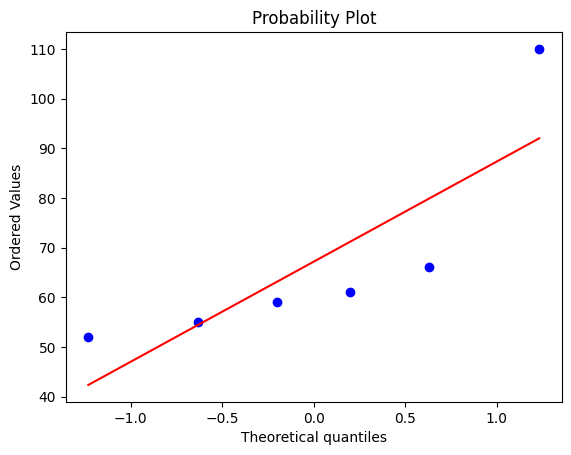

In [5]:
import scipy.stats as stats
import matplotlib.pyplot as plt

stats.probplot(df['weight'], dist=stats.norm, plot=plt)
plt.show()

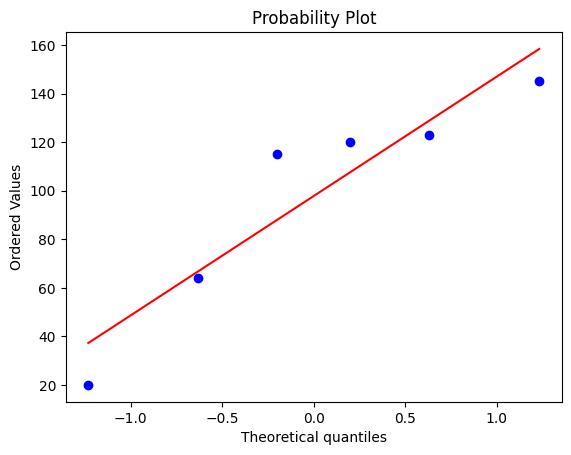

In [6]:
stats.probplot(df['height'], dist=stats.norm, plot=plt)
plt.show()

# p-value가 0.05보다 커야 정규성을 띈다
- shapiro test를 해서 정규성이 아니라면, boxplot 등으로 가야 한다

In [7]:
shapiro_test = stats.shapiro(df['weight'])
shapiro_test

ShapiroResult(statistic=0.7093410491943359, pvalue=0.007742629386484623)

In [8]:
shapiro_test = stats.shapiro(df['height'])
shapiro_test

ShapiroResult(statistic=0.8741567730903625, pvalue=0.2432829588651657)

In [9]:
# UCL, LCL
df['UCL_W'] = df['weight'].mean() + 2 * df['weight'].std()
df['LCL_W'] = df['weight'].mean() - 2 * df['weight'].std()

df['UCL_H'] = df['height'].mean() + 2 * df['height'].std()
df['LCL_H'] = df['height'].mean() - 2 * df['height'].std()

In [10]:
df

,name,weight,height,UCL_W,LCL_W,UCL_H,LCL_H
0,KATE,59,120,110.237152,24.096182,190.986254,4.680412
1,LOUISE,61,123,110.237152,24.096182,190.986254,4.680412
2,JANE,55,115,110.237152,24.096182,190.986254,4.680412
3,JASON,66,145,110.237152,24.096182,190.986254,4.680412
4,TOM,52,64,110.237152,24.096182,190.986254,4.680412
5,JACK,110,20,110.237152,24.096182,190.986254,4.680412


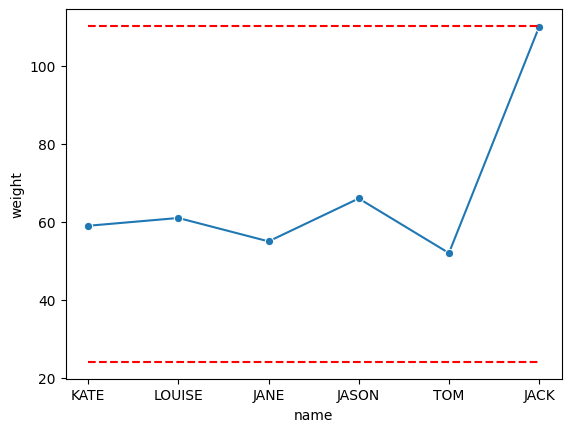

In [11]:
import seaborn as sns

plt.figure()
# sns.scatterplot(x=df['name'], y=df['weight'])
sns.lineplot(x=df['name'], y=df['weight'], marker='o')
plt.plot(df['UCL_W'], linestyle='--', color='r')
plt.plot(df['LCL_W'], linestyle='--', color='r')
plt.show()

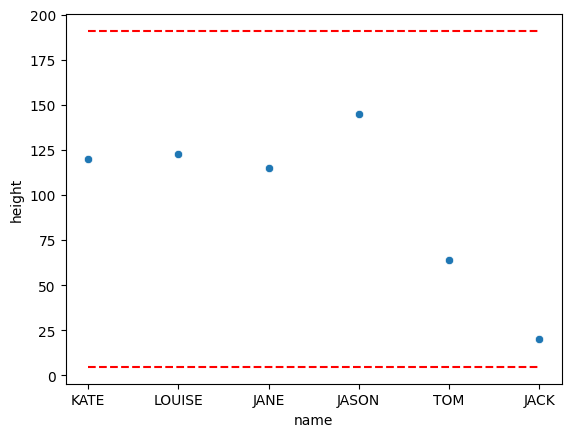

In [12]:
plt.figure()
sns.scatterplot(x=df['name'], y=df['height'])
plt.plot(df['UCL_H'], linestyle='--', color='r')
plt.plot(df['LCL_H'], linestyle='--', color='r')
plt.show()

In [13]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [14]:
dfi = sns.load_dataset('iris')

In [15]:
dfi.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


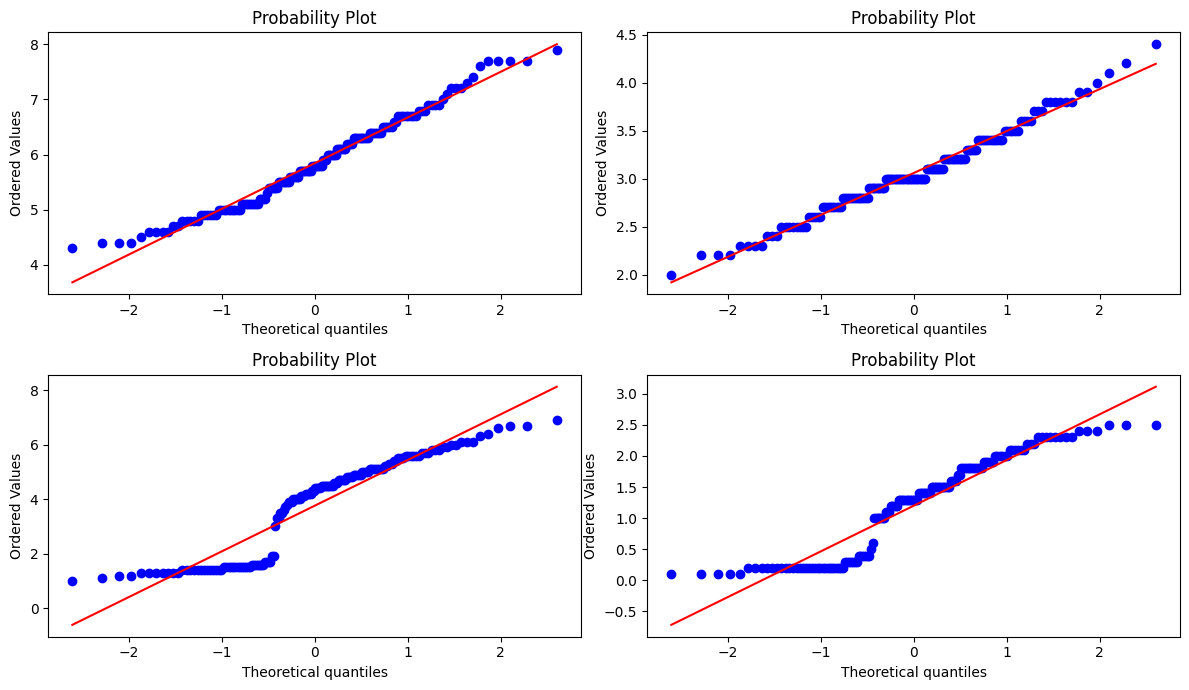

In [41]:
fig = plt.figure(figsize=(12, 7))
var = dfi.columns[0:4]

for i, feature in enumerate(var):
    stats.probplot(dfi[feature], dist=stats.norm, plot=fig.add_subplot(2, 2, i+1))

plt.tight_layout()
plt.show()

In [44]:
shapiro_pl = stats.shapiro(dfi['petal_length'])
shapiro_pw = stats.shapiro(dfi['petal_width'])
shapiro_sl = stats.shapiro(dfi['sepal_length'])
shapiro_sw = stats.shapiro(dfi['sepal_width'])

print(shapiro_pl)
print(shapiro_pw)
print(shapiro_sl)
print(shapiro_sw)

ShapiroResult(statistic=0.8762685656547546, pvalue=7.412652158755861e-10)
ShapiroResult(statistic=0.9018340706825256, pvalue=1.680264105630158e-08)
ShapiroResult(statistic=0.9760899543762207, pvalue=0.01018026564270258)
ShapiroResult(statistic=0.9849168062210083, pvalue=0.10112646222114563)


In [18]:
# UCL, LCL
dfi['UCL_PL'] = dfi['petal_length'].mean() + 2 * dfi['petal_length'].std()
dfi['LCL_PL'] = dfi['petal_length'].mean() - 2 * dfi['petal_length'].std()

dfi['UCL_PW'] = dfi['petal_width'].mean() + 2 * dfi['petal_width'].std()
dfi['LCL_PW'] = dfi['petal_width'].mean() - 2 * dfi['petal_width'].std()

dfi['UCL_SL'] = dfi['sepal_length'].mean() + 2 * dfi['sepal_length'].std()
dfi['LCL_SL'] = dfi['sepal_length'].mean() - 2 * dfi['sepal_length'].std()

dfi['UCL_SW'] = dfi['sepal_width'].mean() + 2 * dfi['sepal_width'].std()
dfi['LCL_SW'] = dfi['sepal_width'].mean() - 2 * dfi['sepal_width'].std()

In [19]:
dfi

,sepal_length,sepal_width,petal_length,petal_width,species,UCL_PL,LCL_PL,UCL_PW,LCL_PW,UCL_SL,LCL_SL,UCL_SW,LCL_SW
0,5.1,3.5,1.4,0.2,setosa,7.288596,0.227404,2.723809,-0.325142,7.499466,4.187201,3.929066,2.185601
1,4.9,3.0,1.4,0.2,setosa,7.288596,0.227404,2.723809,-0.325142,7.499466,4.187201,3.929066,2.185601
2,4.7,3.2,1.3,0.2,setosa,7.288596,0.227404,2.723809,-0.325142,7.499466,4.187201,3.929066,2.185601
3,4.6,3.1,1.5,0.2,setosa,7.288596,0.227404,2.723809,-0.325142,7.499466,4.187201,3.929066,2.185601
4,5.0,3.6,1.4,0.2,setosa,7.288596,0.227404,2.723809,-0.325142,7.499466,4.187201,3.929066,2.185601
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,7.288596,0.227404,2.723809,-0.325142,7.499466,4.187201,3.929066,2.185601
146,6.3,2.5,5.0,1.9,virginica,7.288596,0.227404,2.723809,-0.325142,7.499466,4.187201,3.929066,2.185601
147,6.5,3.0,5.2,2.0,virginica,7.288596,0.227404,2.723809,-0.325142,7.499466,4.187201,3.929066,2.185601
148,6.2,3.4,5.4,2.3,virginica,7.288596,0.227404,2.723809,-0.325142,7.499466,4.187201,3.929066,2.185601


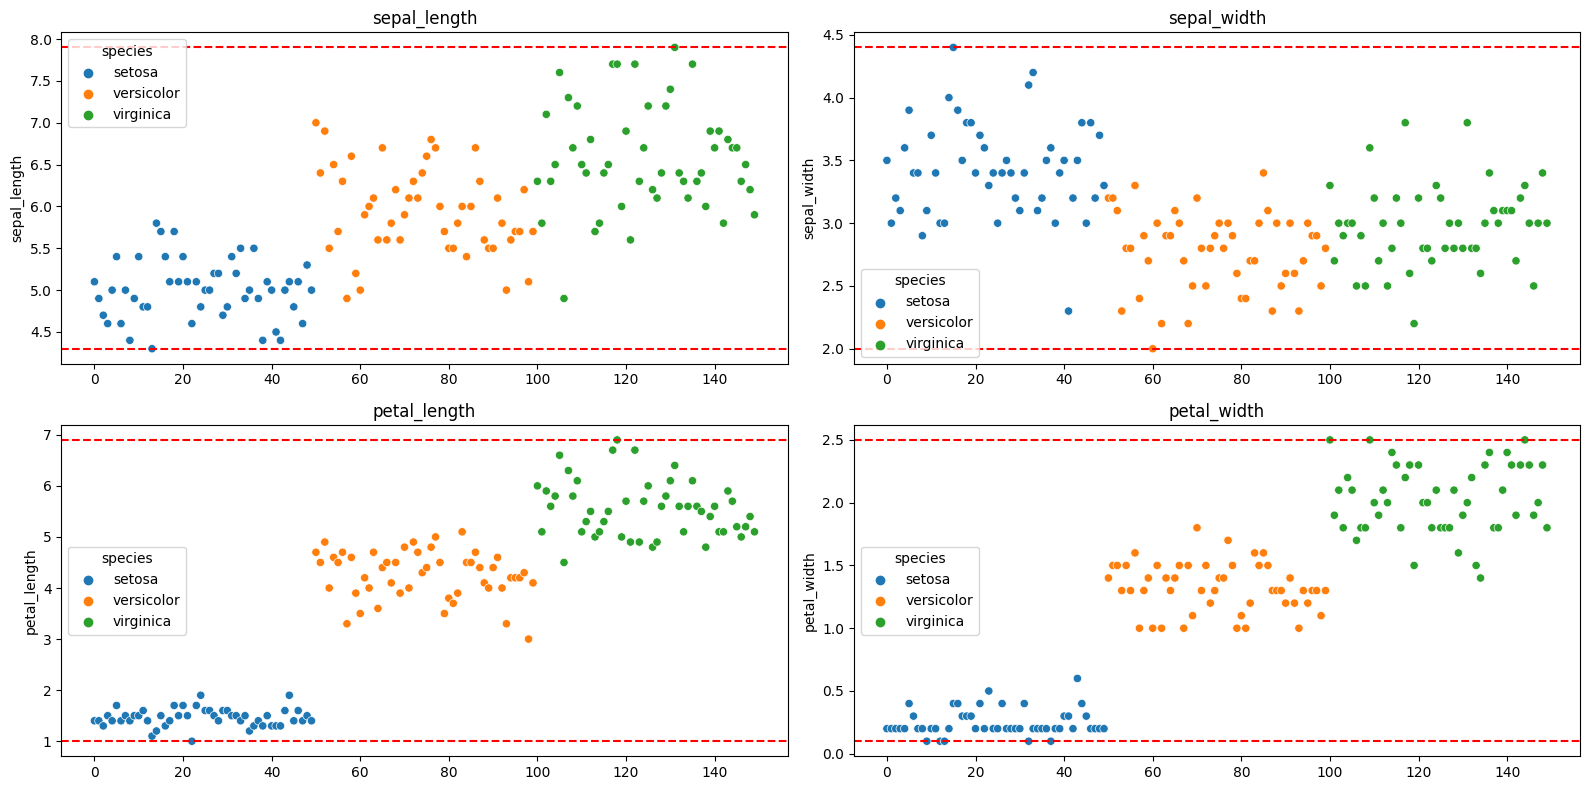

In [20]:
var = dfi.columns[0:4]
fig = plt.figure(figsize=(16, 8))

for i, feature in enumerate(var):
    ax = plt.subplot(2, 2, i+1)
    sns.scatterplot(x=dfi['species'].index, y=dfi[feature], hue=dfi['species'])
    ax.axhline(y=dfi[feature].max(), linestyle='--', color='r')
    ax.axhline(y=dfi[feature].min(), linestyle='--', color='r')
    ax.set_title(feature)

plt.tight_layout()
plt.show()



In [21]:
dfii = dfi.drop(['UCL_PL','LCL_PL','UCL_PW','LCL_PW','UCL_SL','LCL_SL','UCL_SW','LCL_SW'], axis=1)

In [22]:
setosa = dfii[dfii['species'] =='setosa']

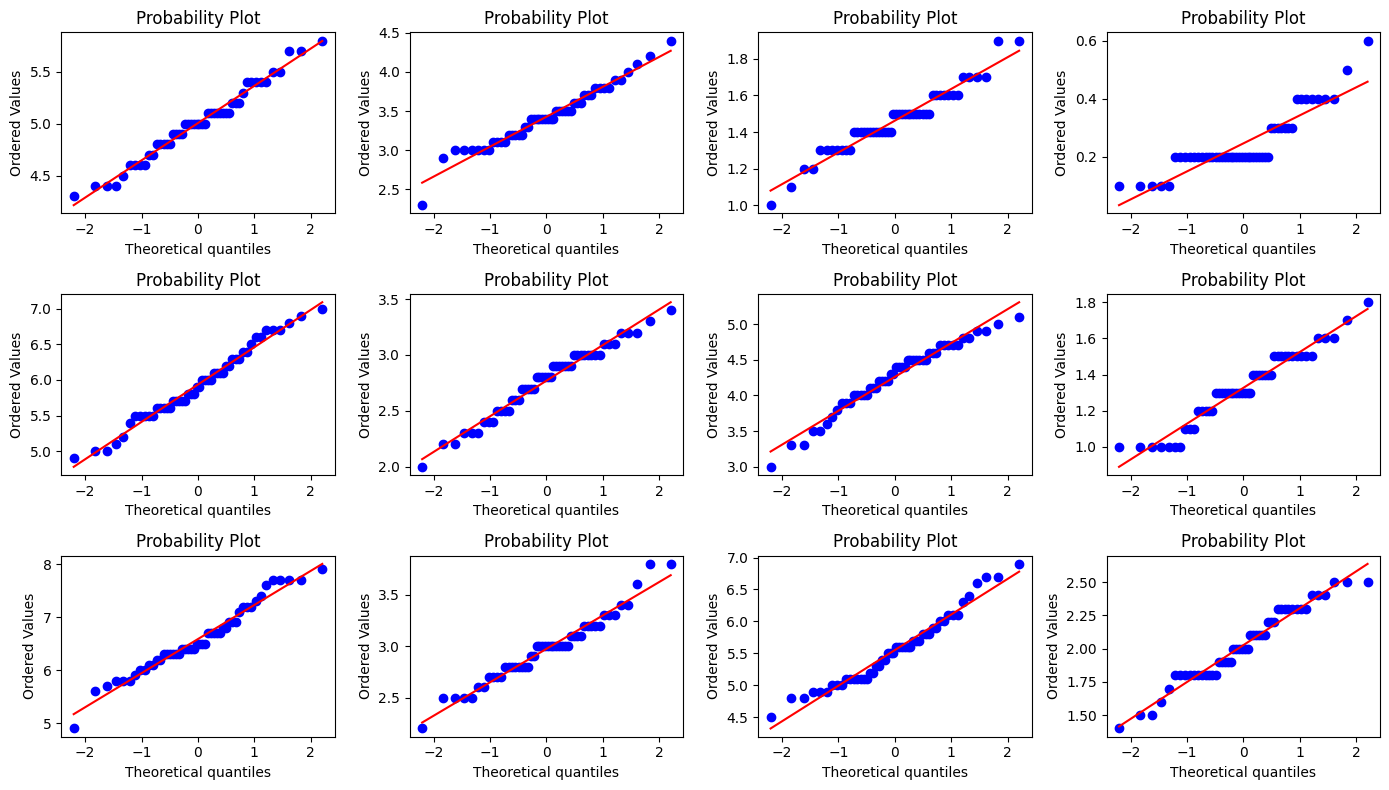

In [48]:
dfii_var = dfii.columns[:-1]
# fig, axes = plt.subplots(3, 4, figsize=(16, 12))

# for i, feature in enumerate(dfii_var):
#     for j, species in enumerate(dfii['species'].unique()):
#         ax = axes[j, i]
#         stats.probplot(dfii[dfii['species'] == species][feature], dist=stats.norm, plot=ax)

fig = plt.figure(figsize=(14,8))

for i, feature in enumerate(dfii_var):
    stats.probplot(dfii[dfii['species'] == 'setosa'][feature], dist=stats.norm, plot=fig.add_subplot(3,4,i+1))
    stats.probplot(dfii[dfii['species'] == 'versicolor'][feature], dist=stats.norm, plot=fig.add_subplot(3,4,i+5))
    stats.probplot(dfii[dfii['species'] == 'virginica'][feature], dist=stats.norm, plot=fig.add_subplot(3,4,i+9))

plt.tight_layout()
plt.show()

In [56]:
for name in dfii['species'].unique():
    for feature in dfii.columns[:-1]:
        dfii[f'UCL_{name}_{feature}'] = dfii[feature].mean() + 2 * dfii[feature].std()
        dfii[f'LCL_{name}_{feature}'] = dfii[feature].mean() - 2 * dfii[feature].std()

TypeError: Could not convert setosasetosasetosasetosasetosasetosasetosasetosasetosasetosasetosasetosasetosasetosasetosasetosasetosasetosasetosasetosasetosasetosasetosasetosasetosasetosasetosasetosasetosasetosasetosasetosasetosasetosasetosasetosasetosasetosasetosasetosasetosasetosasetosasetosasetosasetosasetosasetosasetosasetosaversicolorversicolorversicolorversicolorversicolorversicolorversicolorversicolorversicolorversicolorversicolorversicolorversicolorversicolorversicolorversicolorversicolorversicolorversicolorversicolorversicolorversicolorversicolorversicolorversicolorversicolorversicolorversicolorversicolorversicolorversicolorversicolorversicolorversicolorversicolorversicolorversicolorversicolorversicolorversicolorversicolorversicolorversicolorversicolorversicolorversicolorversicolorversicolorversicolorversicolorvirginicavirginicavirginicavirginicavirginicavirginicavirginicavirginicavirginicavirginicavirginicavirginicavirginicavirginicavirginicavirginicavirginicavirginicavirginicavirginicavirginicavirginicavirginicavirginicavirginicavirginicavirginicavirginicavirginicavirginicavirginicavirginicavirginicavirginicavirginicavirginicavirginicavirginicavirginicavirginicavirginicavirginicavirginicavirginicavirginicavirginicavirginicavirginicavirginicavirginica to numeric

In [58]:
dfii

,sepal_length,sepal_width,petal_length,petal_width,species,UCL_setosa_sepal_length,LCL_setosa_sepal_length,UCL_setosa_sepal_width,LCL_setosa_sepal_width,UCL_setosa_petal_length,...,UCL_versicolor_petal_width,LCL_versicolor_petal_width,UCL_virginica_sepal_length,LCL_virginica_sepal_length,UCL_virginica_sepal_width,LCL_virginica_sepal_width,UCL_virginica_petal_length,LCL_virginica_petal_length,UCL_virginica_petal_width,LCL_virginica_petal_width
0,5.1,3.5,1.4,0.2,setosa,7.499466,4.187201,3.929066,2.185601,7.288596,...,2.723809,-0.325142,7.499466,4.187201,3.929066,2.185601,7.288596,0.227404,2.723809,-0.325142
1,4.9,3.0,1.4,0.2,setosa,7.499466,4.187201,3.929066,2.185601,7.288596,...,2.723809,-0.325142,7.499466,4.187201,3.929066,2.185601,7.288596,0.227404,2.723809,-0.325142
2,4.7,3.2,1.3,0.2,setosa,7.499466,4.187201,3.929066,2.185601,7.288596,...,2.723809,-0.325142,7.499466,4.187201,3.929066,2.185601,7.288596,0.227404,2.723809,-0.325142
3,4.6,3.1,1.5,0.2,setosa,7.499466,4.187201,3.929066,2.185601,7.288596,...,2.723809,-0.325142,7.499466,4.187201,3.929066,2.185601,7.288596,0.227404,2.723809,-0.325142
4,5.0,3.6,1.4,0.2,setosa,7.499466,4.187201,3.929066,2.185601,7.288596,...,2.723809,-0.325142,7.499466,4.187201,3.929066,2.185601,7.288596,0.227404,2.723809,-0.325142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,7.499466,4.187201,3.929066,2.185601,7.288596,...,2.723809,-0.325142,7.499466,4.187201,3.929066,2.185601,7.288596,0.227404,2.723809,-0.325142
146,6.3,2.5,5.0,1.9,virginica,7.499466,4.187201,3.929066,2.185601,7.288596,...,2.723809,-0.325142,7.499466,4.187201,3.929066,2.185601,7.288596,0.227404,2.723809,-0.325142
147,6.5,3.0,5.2,2.0,virginica,7.499466,4.187201,3.929066,2.185601,7.288596,...,2.723809,-0.325142,7.499466,4.187201,3.929066,2.185601,7.288596,0.227404,2.723809,-0.325142
148,6.2,3.4,5.4,2.3,virginica,7.499466,4.187201,3.929066,2.185601,7.288596,...,2.723809,-0.325142,7.499466,4.187201,3.929066,2.185601,7.288596,0.227404,2.723809,-0.325142


In [ ]:
fig = plt.figure()
for i, name in enumerate(dfii['species'].unique()):
    for j, feature in enumerate(dfii[5:]):
        

In [89]:
# UCL, LCL
setosa['UCL_PL'] = setosa['petal_length'].mean() + 2 * setosa['petal_length'].std()
setosa['LCL_PL'] = setosa['petal_length'].mean() - 2 * setosa['petal_length'].std()

setosa['UCL_PW'] = setosa['petal_width'].mean() + 2 * setosa['petal_width'].std()
setosa['LCL_PW'] = setosa['petal_width'].mean() - 2 * setosa['petal_width'].std()

setosa['UCL_SL'] = setosa['sepal_length'].mean() + 2 * setosa['sepal_length'].std()
setosa['LCL_SL'] = setosa['sepal_length'].mean() - 2 * setosa['sepal_length'].std()

setosa['UCL_SW'] = setosa['sepal_width'].mean() + 2 * setosa['sepal_width'].std()
setosa['LCL_SW'] = setosa['sepal_width'].mean() - 2 * setosa['sepal_width'].std()

C:\Users\PC\AppData\Local\Temp\ipykernel_1316\3934769185.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  setosa['UCL_PL'] = setosa['petal_length'].mean() + 2 * setosa['petal_length'].std()
C:\Users\PC\AppData\Local\Temp\ipykernel_1316\3934769185.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  setosa['LCL_PL'] = setosa['petal_length'].mean() - 2 * setosa['petal_length'].std()
C:\Users\PC\AppData\Local\Temp\ipykernel_1316\3934769185.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy 

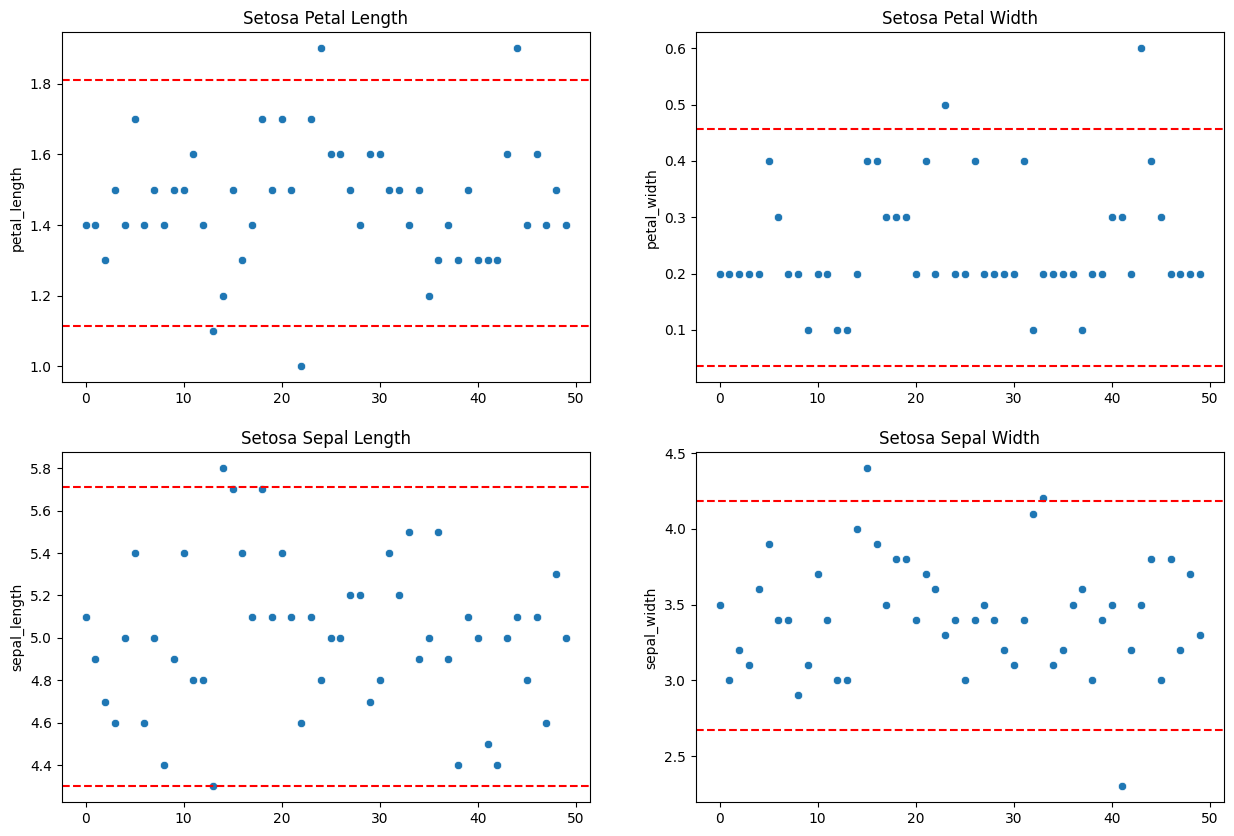

In [115]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

sns.scatterplot(data=setosa['petal_length'], ax=ax[0, 0])
ax[0, 0].axhline(y=setosa['UCL_PL'].max(), linestyle='--', color='r')
ax[0, 0].axhline(y=setosa['LCL_PL'].min(), linestyle='--', color='r')
ax[0, 0].set_title('Setosa Petal Length')

sns.scatterplot(data=setosa['petal_width'], ax=ax[0, 1])
ax[0, 1].axhline(y=setosa['UCL_PW'].max(), linestyle='--', color='r')
ax[0, 1].axhline(y=setosa['LCL_PW'].min(), linestyle='--', color='r')
ax[0, 1].set_title('Setosa Petal Width')

sns.scatterplot(data=setosa['sepal_length'], ax=ax[1, 0])
ax[1, 0].axhline(y=setosa['UCL_SL'].max(), linestyle='--', color='r')
ax[1, 0].axhline(y=setosa['LCL_SL'].min(), linestyle='--', color='r')
ax[1, 0].set_title('Setosa Sepal Length')

sns.scatterplot(data=setosa['sepal_width'], ax=ax[1, 1])
ax[1, 1].axhline(y=setosa['UCL_SW'].max(), linestyle='--', color='r')
ax[1, 1].axhline(y=setosa['LCL_SW'].min(), linestyle='--', color='r')
ax[1, 1].set_title('Setosa Sepal Width')

plt.show()


In [97]:
dfii['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [98]:
versicolor = dfii[dfii['species'] == 'versicolor']

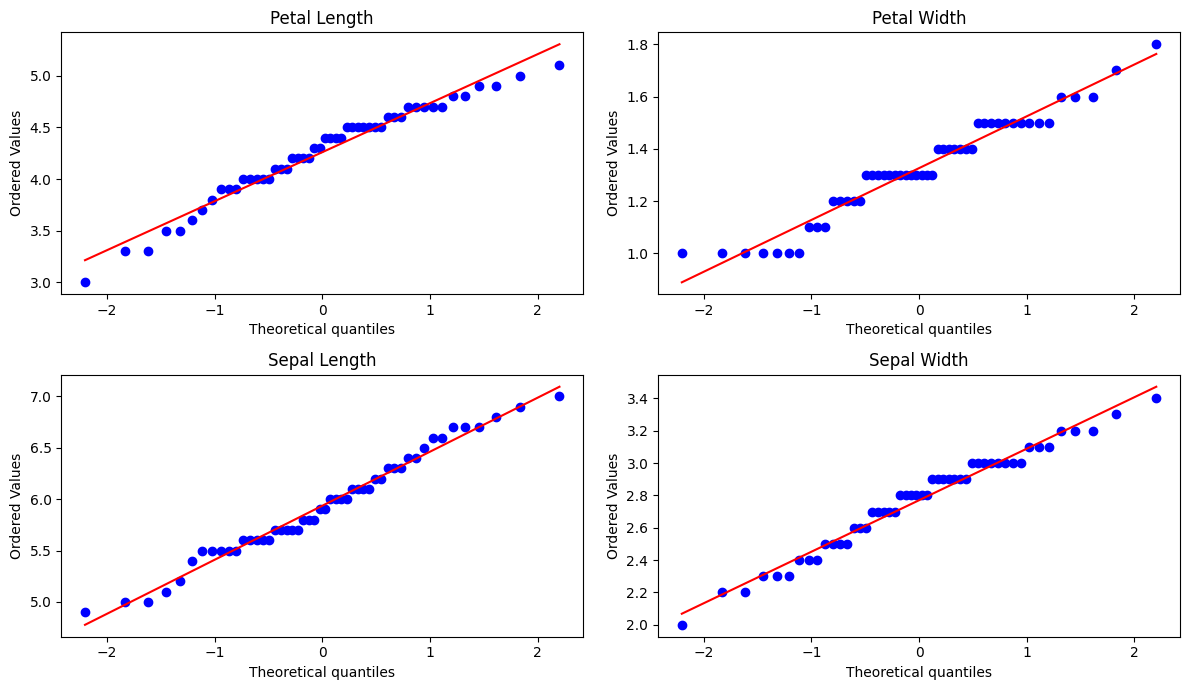

In [99]:
fig, ax = plt.subplots(2, 2, figsize=(12, 7))

stats.probplot(versicolor['petal_length'], dist=stats.norm, plot=ax[0, 0])
ax[0, 0].set_title('Petal Length')

stats.probplot(versicolor['petal_width'], dist=stats.norm, plot=ax[0, 1])
ax[0, 1].set_title('Petal Width')

stats.probplot(versicolor['sepal_length'], dist=stats.norm, plot=ax[1, 0])
ax[1, 0].set_title('Sepal Length')

stats.probplot(versicolor['sepal_width'], dist=stats.norm, plot=ax[1, 1])
ax[1, 1].set_title('Sepal Width')

plt.tight_layout()
plt.show()

In [100]:
# UCL, LCL
versicolor['UCL_PL'] = versicolor['petal_length'].mean() + 2 * versicolor['petal_length'].std()
versicolor['LCL_PL'] = versicolor['petal_length'].mean() - 2 * versicolor['petal_length'].std()

versicolor['UCL_PW'] = versicolor['petal_width'].mean() + 2 * versicolor['petal_width'].std()
versicolor['LCL_PW'] = versicolor['petal_width'].mean() - 2 * versicolor['petal_width'].std()

versicolor['UCL_SL'] = versicolor['sepal_length'].mean() + 2 * versicolor['sepal_length'].std()
versicolor['LCL_SL'] = versicolor['sepal_length'].mean() - 2 * versicolor['sepal_length'].std()

versicolor['UCL_SW'] = versicolor['sepal_width'].mean() + 2 * versicolor['sepal_width'].std()
versicolor['LCL_SW'] = versicolor['sepal_width'].mean() - 2 * versicolor['sepal_width'].std()

C:\Users\PC\AppData\Local\Temp\ipykernel_1316\3059955972.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  versicolor['UCL_PL'] = versicolor['petal_length'].mean() + 2 * versicolor['petal_length'].std()
C:\Users\PC\AppData\Local\Temp\ipykernel_1316\3059955972.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  versicolor['LCL_PL'] = versicolor['petal_length'].mean() - 2 * versicolor['petal_length'].std()
C:\Users\PC\AppData\Local\Temp\ipykernel_1316\3059955972.py:5: SettingWithCopyWarning: 
A value is try

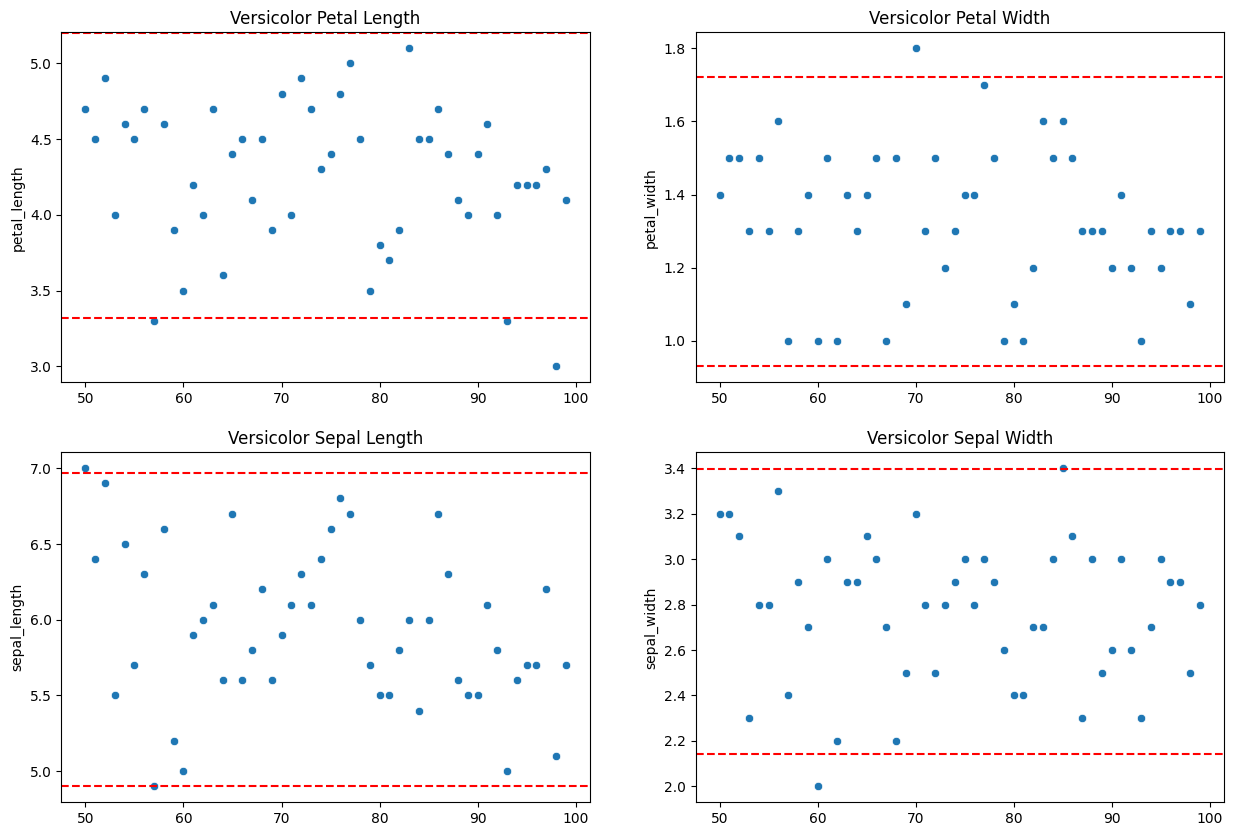

In [101]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

sns.scatterplot(data=versicolor['petal_length'], ax=ax[0, 0])
ax[0, 0].axhline(y=versicolor['UCL_PL'].max(), linestyle='--', color='r')
ax[0, 0].axhline(y=versicolor['LCL_PL'].min(), linestyle='--', color='r')
ax[0, 0].set_title('Versicolor Petal Length')

sns.scatterplot(data=versicolor['petal_width'], ax=ax[0, 1])
ax[0, 1].axhline(y=versicolor['UCL_PW'].max(), linestyle='--', color='r')
ax[0, 1].axhline(y=versicolor['LCL_PW'].min(), linestyle='--', color='r')
ax[0, 1].set_title('Versicolor Petal Width')

sns.scatterplot(data=versicolor['sepal_length'], ax=ax[1, 0])
ax[1, 0].axhline(y=versicolor['UCL_SL'].max(), linestyle='--', color='r')
ax[1, 0].axhline(y=versicolor['LCL_SL'].min(), linestyle='--', color='r')
ax[1, 0].set_title('Versicolor Sepal Length')

sns.scatterplot(data=versicolor['sepal_width'], ax=ax[1, 1])
ax[1, 1].axhline(y=versicolor['UCL_SW'].max(), linestyle='--', color='r')
ax[1, 1].axhline(y=versicolor['LCL_SW'].min(), linestyle='--', color='r')
ax[1, 1].set_title('Versicolor Sepal Width')

plt.show()
